In [3]:
"""
Script python pour lire les fichiers de traces de clavier

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy.core.fromnumeric import shape
import pandas as pd
import time
import os
from os import walk
print(os.getcwd())

C:\Users\lucas\CODE_Python\challenge


In [4]:
# %pip install scikit-plot
# %pip install --upgrade scikit-learn
# %pip install pykalman

from scikitplot.metrics import plot_roc_curve

In [5]:
# Import general libraries
import pandas as pd
import requests
import numpy as np
import sys
import subprocess
import warnings
import bs4 as bs
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons, make_circles, make_classification

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap

# Import Machine Learning workflow, metrics packages
import pykalman
import statsmodels.api
import statsmodels.api as sm
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.stats import kurtosis, skew
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import StratifiedKFold

# Import some classifiers and models
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import svm, datasets
from statsmodels.tsa.api import VAR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier

# Import preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

# Set the environment display parameters
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2
np.random.seed(42)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:

def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]


def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]


def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm


def get_pics_from_file(filename, details=False):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+filename)
    f_pic = open(filename, "rb")

    info = dict()
    info["nb_pics"] = read_int(f_pic)
    info["freq_sampling_khz"] = read_double(f_pic)
    info["freq_trame_hz"] = read_double(f_pic)
    info["freq_pic_khz"] = read_double(f_pic)
    info["norm_fact"] = read_double(f_pic)

    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    f_pic.close()

    if details:
        print("Nb pics par trame: " + str(info["nb_pics"]))
        print("Frequence d'echantillonnage: " +
              str(info["freq_sampling_khz"]) + " kHz")
        print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
        print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
        print("Facteur de normalisation: " + str(info["norm_fact"]))
        print("Nb trames: " + str(nb_trames))

    return tab_pics, info

Ouverture du fichier de pics ./data/pics_NOKEY.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 12802
Ouverture du fichier de pics ./data/pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701
Ouverture du fichier de pics ./data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102






c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


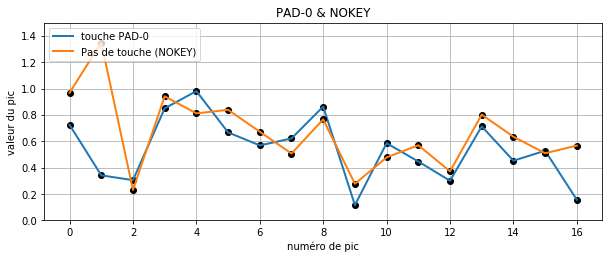

In [7]:
# Set the environment display parameters
mpl.rcParams['figure.figsize'] = 10, 8
mpl.rcParams['lines.linewidth'] = 2
np.random.seed(42)

if __name__ == "__main__":
    pics_nokey, info = get_pics_from_file("./data/pics_NOKEY.bin", details=True)
    pics_pad0, info = get_pics_from_file("./data/pics_0.bin", details=True)
    pics_loginmdp, info = get_pics_from_file("./data/pics_LOGINMDP.bin", details=True)

    ######### Pics ############
    # NO KEY
    plt.figure(1)
    plt.subplot(211)
    plt.plot(range(0, info["nb_pics"]), pics_nokey[0], 'ko')
    plt.plot(pics_nokey[0], label='touche PAD-0')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('no key')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    
    print('\n')
    
    # PAD-0
    plt.subplot(211)
    print('\n')
    plt.plot(range(0, info["nb_pics"]), pics_pad0[0], 'ko')
    plt.plot(pics_pad0[0], label='Pas de touche (NOKEY)')
    plt.legend(loc='upper left')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('PAD-0 & NOKEY')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    #
    plt.show()

In [8]:
mypath = ".//data"

from os import listdir
from os.path import isfile, join
pics_files_list = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    
print(pics_files_list)
    

['pics_0.bin', 'pics_1.bin', 'pics_2.bin', 'pics_3.bin', 'pics_4.bin', 'pics_5.bin', 'pics_6.bin', 'pics_7.bin', 'pics_8.bin', 'pics_9.bin', 'pics_A.bin', 'pics_B.bin', 'pics_C.bin', 'pics_CTRL.bin', 'pics_D.bin', 'pics_E.bin', 'pics_ENTER.bin', 'pics_F.bin', 'pics_G.bin', 'pics_H.bin', 'pics_I.bin', 'pics_J.bin', 'pics_K.bin', 'pics_L.bin', 'pics_LOGINMDP.bin', 'pics_M.bin', 'pics_N.bin', 'pics_NOKEY.bin', 'pics_O.bin', 'pics_P.bin', 'pics_Q.bin', 'pics_R.bin', 'pics_S.bin', 'pics_SHIFT.bin', 'pics_SPACE.bin', 'pics_SUPPR.bin', 'pics_T.bin', 'pics_U.bin', 'pics_V.bin', 'pics_W.bin', 'pics_X.bin', 'pics_Y.bin', 'pics_Z.bin']


In [9]:
mypath = "./data"

# Create the data for our model
df_pics = pd.DataFrame()
pics_dict = {}

pics_array_NOKEY, info = get_pics_from_file(mypath + "\\" + 'pics_NOKEY.bin', details=False)

for pics_file in pics_files_list:
    pics_array, info = get_pics_from_file(mypath + "\\" + pics_file, details=False)
    
    df_NOKEY = pd.DataFrame(pics_array_NOKEY[:6000], columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])
    df_NOKEY_md = df_NOKEY.median(axis=0).dropna()
    
    file_df = pd.DataFrame(pics_array[:6000], columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])
    count = 0
    # CLEANING DATA > Delete row similar to NOKEY
    max_boundcross = ((np.quantile(file_df, 0.97, axis=0) - file_df).min(axis=1)>0)
    min_boundcross = ((file_df - np.quantile(file_df, 0.03, axis=0)).min(axis=1)>0)
    
    if pics_file != "pics_LOGINMDP.bin":
        
        file_df_clean = file_df[max_boundcross & min_boundcross]
        file_df_clean = file_df_clean.reset_index(drop=True)
    
        file_df_clean = file_df_clean - df_NOKEY_md
    
    else:
        pics_array, info = get_pics_from_file(mypath + "\\" + pics_file, details=False)

        df_NOKEY = pd.DataFrame(pics_array_NOKEY[:6000], columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])
        df_NOKEY_md = df_NOKEY.median(axis=0).dropna()

        file_df = pd.DataFrame(pics_array[:], columns=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])
        file_df_clean = file_df - df_NOKEY_md
    
    print(len(file_df_clean))
    
    # ADDING MAX PIC
    max_pic = file_df_clean.max(axis=1)
    max_min = file_df_clean.min(axis=1)
    
    # LAG MAX PIC
    lag = 1
    file_df_lag1 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag1 = file_df_lag1.rename(columns={'max': f'max_pic_{lag}'})

    lag = 2
    file_df_lag2 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag2 = file_df_lag2.rename(columns={'max': f'max_pic_{lag}'})
    
    lag = 3
    file_df_lag3 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag3 = file_df_lag3.rename(columns={'max': f'max_pic_{lag}'})
    
    lag = 4
    file_df_lag4 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag4 = file_df_lag4.rename(columns={'max': f'max_pic_{lag}'})

    lag = 5
    file_df_lag5 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag5 = file_df_lag5.rename(columns={'max': f'max_pic_{lag}'})
    
    lag = 6
    file_df_lag6 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag6 = file_df_lag6.rename(columns={'max': f'max_pic_{lag}'})
    
    lag = 7
    file_df_lag7 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag7 = file_df_lag7.rename(columns={'max': f'max_pic_{lag}'})
    
    lag = 8
    file_df_lag8 = pd.DataFrame(max_pic.shift(lag), columns=['max'])
    file_df_lag8 = file_df_lag8.rename(columns={'max': f'max_pic_{lag}'})

    # Add lags values    
    file_df_lagged = pd.concat([file_df_clean, file_df_lag1, file_df_lag2, file_df_lag3, file_df_lag4, file_df_lag5, file_df_lag6, file_df_lag7, file_df_lag8, max_pic, max_min], axis=1).dropna(axis=0)
    
    # Adding the target variable
    file_df_lagged['KEY_PRESSED'] = pics_file.replace(".bin","").replace("pics_", "")
    
    pics_dict[pics_file.replace(".bin","").replace("pics_", "")] = file_df_lagged
    


Ouverture du fichier de pics ./data\pics_NOKEY.bin
Ouverture du fichier de pics ./data\pics_0.bin
2897
Ouverture du fichier de pics ./data\pics_1.bin
3057
Ouverture du fichier de pics ./data\pics_2.bin
3093
Ouverture du fichier de pics ./data\pics_3.bin
3085
Ouverture du fichier de pics ./data\pics_4.bin
3101
Ouverture du fichier de pics ./data\pics_5.bin
3076
Ouverture du fichier de pics ./data\pics_6.bin
3173
Ouverture du fichier de pics ./data\pics_7.bin
3052
Ouverture du fichier de pics ./data\pics_8.bin
3164
Ouverture du fichier de pics ./data\pics_9.bin
3149
Ouverture du fichier de pics ./data\pics_A.bin
3146
Ouverture du fichier de pics ./data\pics_B.bin
3073
Ouverture du fichier de pics ./data\pics_C.bin
3086
Ouverture du fichier de pics ./data\pics_CTRL.bin
3080
Ouverture du fichier de pics ./data\pics_D.bin
3096
Ouverture du fichier de pics ./data\pics_E.bin
3103
Ouverture du fichier de pics ./data\pics_ENTER.bin
2904
Ouverture du fichier de pics ./data\pics_F.bin
3165
Ouvert

In [10]:
file_df_lagged.head()
file_df_lagged.tail()

0         1         2         3         4         5         6  \
3149 -0.057983  0.131836 -0.092773 -0.051880  0.075073  0.133667  0.800781   
3150  0.118408 -0.153198 -0.111694 -0.021362  0.267334 -0.114136  0.626221   
3151  0.013428 -0.209961  0.003052  0.153809  0.032349  0.021973  0.960083   
3152 -0.009155 -0.123291 -0.050659 -0.014038  0.079956  0.237427  0.612793   
3153  0.129395  0.093384  0.029907 -0.078125  0.250854  0.159302  0.592651   

             7         8         9  ...  max_pic_2  max_pic_3  max_pic_4  \
3149  0.067749  0.085449 -0.141602  ...   0.772095   0.458374   0.988770   
3150  0.108643  0.100098  0.045166  ...   0.889282   0.772095   0.458374   
3151  0.067749 -0.172729 -0.060425  ...   0.800781   0.889282   0.772095   
3152  0.094604  0.139771 -0.151367  ...   0.626221   0.800781   0.889282   
3153  0.033569 -0.164795  0.073242  ...   0.960083   0.626221   0.800781   

      max_pic_5  max_pic_6  max_pic_7  max_pic_8         0         1  \
3149   0.727539   0.891113   0.581055   0.692139  0.800781 -0.172729   
3150   0.988770   0.727539   0.891113   0.581055  0.626221 -0.187988   
3151   0.458374   0.988770   0.727539   0.891113  0.960083 -0.209961   
3152   0.772095   0.458374   0.988770   0.727539  0.612793 -0.188599   
3153   0.889282   0.772095   0.458374   0.988770  0.592651 -0.164795   

      KEY_PRESSED  
3149            Z  
3150            Z  
3151            Z  
3152            Z  
3153            Z  

[5 rows x 28 columns]

In [11]:
file_df_lagged.describe()

0            1            2            3            4  \
count  3146.000000  3146.000000  3146.000000  3146.000000  3146.000000   
mean      0.028843     0.000572    -0.005477     0.025902     0.015866   
std       0.111795     0.117235     0.096274     0.149169     0.124499   
min      -0.187988    -0.244751    -0.167236    -0.595093    -0.270996   
25%      -0.055389    -0.085449    -0.078125    -0.064697    -0.072632   
50%       0.024414    -0.002441    -0.019226     0.031128     0.013428   
75%       0.111084     0.080566     0.053101     0.127563     0.107422   
max       0.286255     0.313721     0.402222     0.342407     0.307007   

                 5            6            7            8            9  ...  \
count  3146.000000  3146.000000  3146.000000  3146.000000  3146.000000  ...   
mean      0.017505     0.763251     0.042408     0.009052    -0.002740  ...   
std       0.125054     0.191766     0.154407     0.123420     0.110911  ...   
min      -0.257568    -0.286255    -0.269775    -0.346680    -0.187988  ...   
25%      -0.073853     0.653687    -0.059814    -0.075684    -0.086670  ...   
50%       0.012817     0.780334     0.031128     0.015259    -0.016479  ...   
75%       0.106201     0.897827     0.130615     0.100555     0.064087  ...   
max       0.383301     1.096191     0.858765     0.272217     0.457153  ...   

         max_pic_1    max_pic_2    max_pic_3    max_pic_4    max_pic_5  \
count  3146.000000  3146.000000  3146.000000  3146.000000  3146.000000   
mean      0.774953     0.774992     0.774999     0.774967     0.774999   
std       0.162013     0.161989     0.161998     0.162038     0.162053   
min       0.233765     0.233765     0.233765     0.233765     0.233765   
25%       0.659332     0.659790     0.659790     0.659790     0.659790   
50%       0.782471     0.782471     0.782471     0.782471     0.782471   
75%       0.898285     0.898285     0.898285     0.898285     0.898438   
max       1.096191     1.096191     1.096191     1.096191     1.096191   

         max_pic_6    max_pic_7    max_pic_8            0            1  
count  3146.000000  3146.000000  3146.000000  3146.000000  3146.000000  
mean      0.774910     0.774912     0.774948     0.774846    -0.195374  
std       0.162068     0.162068     0.162010     0.162022     0.065732  
min       0.233765     0.233765     0.233765     0.233765    -0.595093  
25%       0.659332     0.659332     0.659332     0.659180    -0.228271  
50%       0.782166     0.782166     0.782166     0.782166    -0.187378  
75%       0.898438     0.898438     0.898438     0.897827    -0.154419  
max       1.096191     1.096191     1.096191     1.096191    -0.020752  

[8 rows x 27 columns]

In [12]:
allpics_df = pd.DataFrame()
for i in pics_dict.keys():
    allpics_df = pd.concat([allpics_df, pics_dict[i].iloc[:100,:]], ignore_index=True)

allpics_df['KEY_PRESSED'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'CTRL', 'D', 'E', 'ENTER', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'LOGINMDP', 'M', 'N', 'NOKEY', 'O', 'P', 'Q', 'R', 'S', 'SHIFT',
       'SPACE', 'SUPPR', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [100]:
len_array = []
for key in pics_dict.keys():
    len_array.append((len(pics_dict[key])))
print(len_array)
pritn(np.array(len_array).min())

[2889, 3049, 3085, 3077, 3093, 3068, 3165, 3044, 3156, 3141, 3138, 3065, 3078, 3072, 3088, 3095, 2896, 3157, 3098, 3072, 3164, 3106, 3151, 3112, 11093, 2857, 3043, 2949, 3092, 2840, 3125, 3160, 3191, 2944, 3126, 2902, 3068, 3117, 3143, 3033, 3113, 3025, 3146]


2840

In [198]:
#####################################

len_array = []
for key in pics_dict.keys():
    len_array.append((len(pics_dict[key])))

# ________________________CHANGE HERE FOR SMALLER COMPUTATION TIME_________________________
# period_min = np.array(len_array).min() #> Largest MODEL USED FOR FINAL PRESENTATION 
                                        #(very computationally intensive (don't add much in accuracy))
    
period_min = 500 #> Select 500 data per class > still good result but can differ from final presentation


print(np.array(len_array).min())

allpics_df = pd.DataFrame()

for i in pics_dict.keys():
    allpics_df = pd.concat([allpics_df, pics_dict[i].iloc[:period_min,:]], ignore_index=True)

allpics_df

2840


0         1         2         3         4         5         6  \
0      -0.047607  1.222534 -0.162354  0.138550  0.080566  0.018311  0.021362   
1       0.024414  1.061401 -0.081787 -0.053101 -0.219727  0.021973  0.103149   
2       0.080566  1.015015 -0.145264  0.208130  0.169678 -0.147705  0.227051   
3       0.206299  1.003418 -0.150757  0.016479 -0.101929  0.145874  0.136108   
4      -0.048828  1.095581  0.139160  0.122681  0.026245  0.128174  0.045166   
...          ...       ...       ...       ...       ...       ...       ...   
122115 -0.172119 -0.031738 -0.109253 -0.137939 -0.111084 -0.130615  0.899048   
122116 -0.104370 -0.126343  0.264893  0.066528 -0.179443 -0.076904  0.739746   
122117  0.094604 -0.188599  0.010376  0.176392  0.173950  0.101929  0.704956   
122118 -0.129395  0.056763  0.068970  0.077515  0.228882  0.211792  0.690308   
122119  0.161743  0.079346 -0.092163 -0.219116  0.174561  0.148315  0.642090   

               7         8         9  ...  max_pic_2  max_pic_3  max_pic_4  \
0      -0.154419  0.103760 -0.043945  ...   0.876465   0.921021   1.116333   
1      -0.107422  0.068970 -0.113525  ...   0.728149   0.876465   0.921021   
2       0.084229  0.024414  0.051880  ...   1.222534   0.728149   0.876465   
3      -0.172119 -0.022583 -0.052490  ...   1.061401   1.222534   0.728149   
4      -0.186768  0.075073  0.040894  ...   1.015015   1.061401   1.222534   
...          ...       ...       ...  ...        ...        ...        ...   
122115 -0.031128 -0.285034 -0.073242  ...   0.684204   0.874023   0.878906   
122116  0.061646  0.009155  0.115967  ...   0.872192   0.684204   0.874023   
122117  0.267334  0.138550 -0.108643  ...   0.899048   0.872192   0.684204   
122118 -0.026855 -0.105591 -0.109253  ...   0.739746   0.899048   0.872192   
122119  0.206299  0.250244  0.064087  ...   0.704956   0.739746   0.899048   

        max_pic_5  max_pic_6  max_pic_7  max_pic_8         0         1  \
0        0.903320   0.968018   0.856323   0.912476  1.222534 -0.202026   
1        1.116333   0.903320   0.968018   0.856323  1.061401 -0.219727   
2        0.921021   1.116333   0.903320   0.968018  1.015015 -0.231323   
3        0.876465   0.921021   1.116333   0.903320  1.003418 -0.212402   
4        0.728149   0.876465   0.921021   1.116333  1.095581 -0.245972   
...           ...        ...        ...        ...       ...       ...   
122115   0.692749   0.616455   0.494385   0.983276  0.899048 -0.285034   
122116   0.878906   0.692749   0.616455   0.494385  0.739746 -0.199585   
122117   0.874023   0.878906   0.692749   0.616455  0.704956 -0.188599   
122118   0.684204   0.874023   0.878906   0.692749  0.690308 -0.129395   
122119   0.872192   0.684204   0.874023   0.878906  0.642090 -0.228271   

        KEY_PRESSED  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
122115            Z  
122116            Z  
122117            Z  
122118            Z  
122119            Z  

[122120 rows x 28 columns]

Text(0.5, 0.98, 'Correlation of 100 series values over 17 pics')

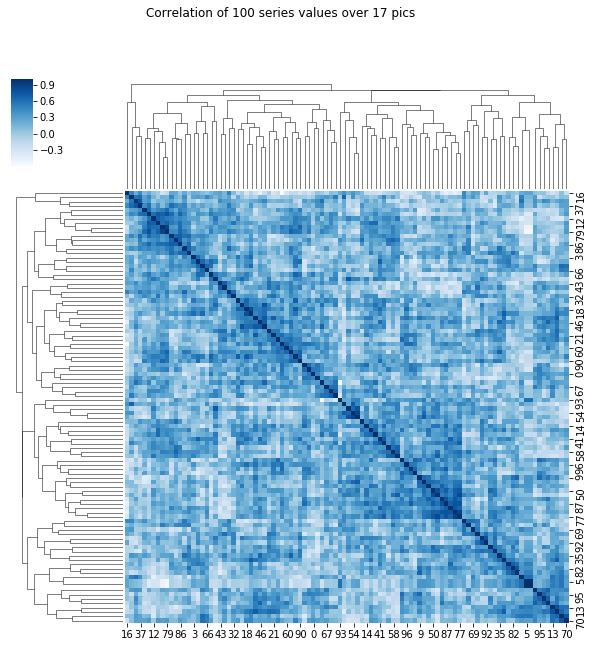

In [181]:
# Set the environment display parameters
mpl.rcParams['figure.figsize'] = 10, 15
mpl.rcParams['lines.linewidth'] = 2

corr_df = allpics_df.iloc[:100,:17].sample(frac=1).reset_index(drop=True)

sns.clustermap(corr_df.T.corr(method="spearman"), cmap="Blues").fig.suptitle('Correlation of {} series values over 17 pics'.format(len(corr_df)))

In [182]:
allpics_df.iloc[:,17::-1]

max_pic_1        16        15        14        13        12        11  \
0       0.728149 -0.122681 -0.014038  0.023193  0.021973 -0.017090 -0.042725   
1       1.222534  0.190430 -0.039062  0.105591  0.086060  0.073853  0.155029   
2       1.061401 -0.017090  0.242310  0.021973 -0.001831  0.028076  0.034180   
3       1.015015 -0.108643 -0.111084  0.129395  0.255127 -0.051880 -0.212402   
4       1.003418  0.050659 -0.245972  0.238037 -0.011597 -0.005493  0.064087   
...          ...       ...       ...       ...       ...       ...       ...   
21495   1.094360 -0.037231  0.245972 -0.260010 -0.242310 -0.073242 -0.068970   
21496   0.952148 -0.045776 -0.083008 -0.126343  0.116577  0.213013 -0.173950   
21497   0.627441 -0.048828  0.037231 -0.167236  0.174561 -0.055542 -0.050049   
21498   0.656128  0.045776  0.079956 -0.101318  0.225220 -0.009766  0.128174   
21499   0.499878 -0.048218 -0.117798  0.074463  0.105591 -0.198364 -0.090332   

             10         9         8         7         6         5         4  \
0     -0.202026 -0.043945  0.103760 -0.154419  0.021362  0.018311  0.080566   
1     -0.002441 -0.113525  0.068970 -0.107422  0.103149  0.021973 -0.219727   
2     -0.231323  0.051880  0.024414  0.084229  0.227051 -0.147705  0.169678   
3      0.037842 -0.052490 -0.022583 -0.172119  0.136108  0.145874 -0.101929   
4      0.000610  0.040894  0.075073 -0.186768  0.045166  0.128174  0.026245   
...         ...       ...       ...       ...       ...       ...       ...   
21495  0.083008 -0.002441  0.087891  0.323486  0.952148 -0.101929  0.148926   
21496 -0.042725  0.171509 -0.030518  0.120850  0.627441 -0.233765  0.225220   
21497  0.207520  0.227661  0.085449  0.370483  0.656128 -0.256348  0.021973   
21498  0.111084 -0.136108 -0.001831  0.048828  0.499878  0.018921 -0.170288   
21499  0.136719  0.029907  0.084839  0.114136  0.520020  0.181274  0.117798   

              3         2         1         0  
0      0.138550 -0.162354  1.222534 -0.047607  
1     -0.053101 -0.081787  1.061401  0.024414  
2      0.208130 -0.145264  1.015015  0.080566  
3      0.016479 -0.150757  1.003418  0.206299  
4      0.122681  0.139160  1.095581 -0.048828  
...         ...       ...       ...       ...  
21495 -0.039673  0.222778  0.199585 -0.112915  
21496 -0.076904  0.000000  0.133057 -0.011597  
21497 -0.209961 -0.130005  0.053711  0.013428  
21498  0.075684 -0.036621 -0.155640  0.000000  
21499 -0.038452  0.139771  0.034790 -0.032959  

[21500 rows x 18 columns]

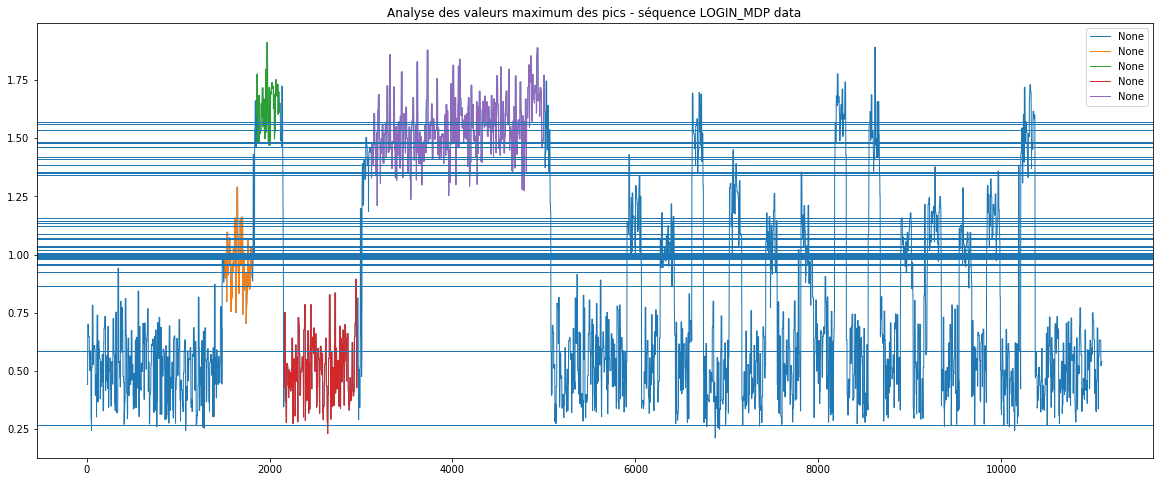

In [342]:
# Max frequency analysis
max_pic_letter = []
for col in allpics_df['KEY_PRESSED'].unique():
    max_pic_letter.append(allpics_df[allpics_df['KEY_PRESSED']==col].quantile(0.95, axis=1).mean(axis=0))

mpl.rcParams['figure.figsize'] = 20, 8
mpl.rcParams['lines.linewidth'] = 1

pics_dict['LOGINMDP'].max(axis=1).plot(title='Analyse des valeurs maximum des pics - séquence LOGIN_MDP data')

# Add lags values    
ctrl_alt_pressed = pics_dict['LOGINMDP'].max(axis=1)[1500:1800]
ctrl_alt_pressed.plot()

# Add lags values    
ctrl_alt_suppr_pressed = pics_dict['LOGINMDP'].max(axis=1)[1850:2100]
ctrl_alt_suppr_pressed.plot()

# Add lags values    
login_pressed = pics_dict['LOGINMDP'].max(axis=1)[2150:2950]
login_pressed.plot()

# Add lags values    
shift_pressed = pics_dict['LOGINMDP'].max(axis=1)[3100:5000]
shift_pressed.plot()

for i in range(len(max_pic_letter)):
    plt.axhline(y=max_pic_letter[i], xmin=0, xmax=1)
plt.legend()

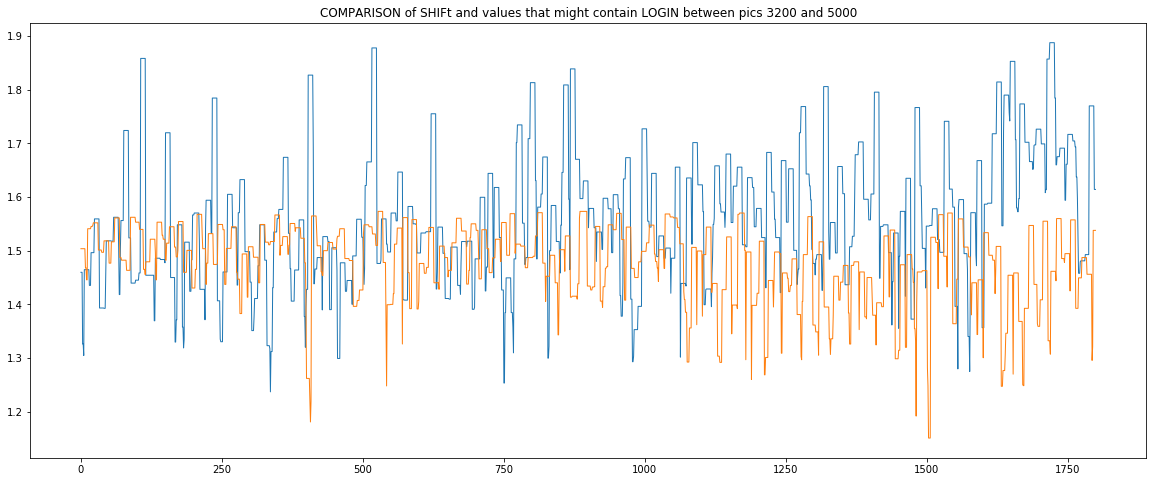

In [341]:
# Add lags values
# Exploring if LOGIN is still hidding in data

ctrl_alt_suppr_pressed = pics_dict['LOGINMDP'].max(axis=1)[3200:5000].reset_index(drop=True)
ctrl_alt_suppr_pressed.plot()

ctrl_alt_suppr_pressed = pics_dict['SHIFT'].max(axis=1).reset_index(drop=True)[:1800]
ctrl_alt_suppr_pressed.plot(title="COMPARISON of SHIFt and values that might contain LOGIN between pics 3200 and 5000")

In [184]:
#         kf = KalmanFilter(transition_matrices=[1],
#                           observation_matrices=[1],
#                           initial_state_mean=measurements[0],
#                           initial_state_covariance=1,
#                           observation_covariance=5,
#                           transition_covariance=1) 
#         state_means, state_covariances = kf.filter(measurements) 
        
#         plt.plot(measurements, '-r', label='', alpha=0.02) 
#         plt.plot(state_means, '-g', label='', alpha=0.04) 

#             if i == len(kalman_array):
#                 plt.plot(measurements, '-r', label='measurement', alpha=0.04) 
#             plt.plot(state_means, '-g', label='kalman-filter output', alpha=0.04) 

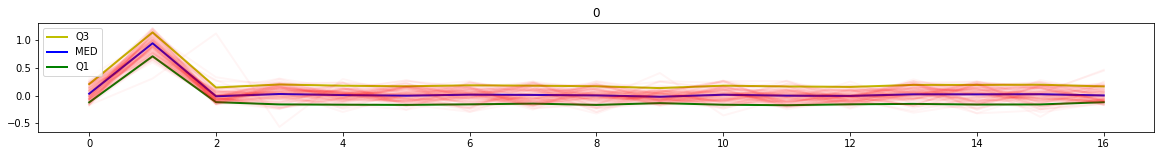

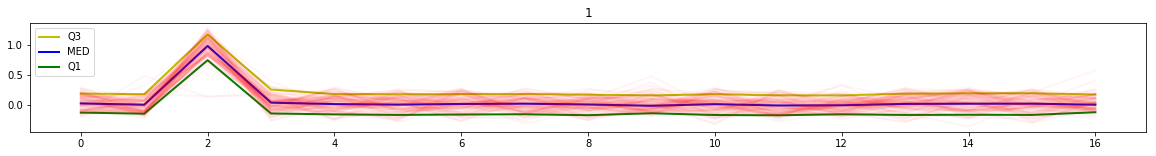

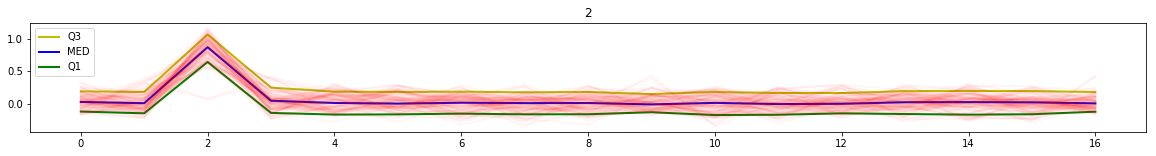

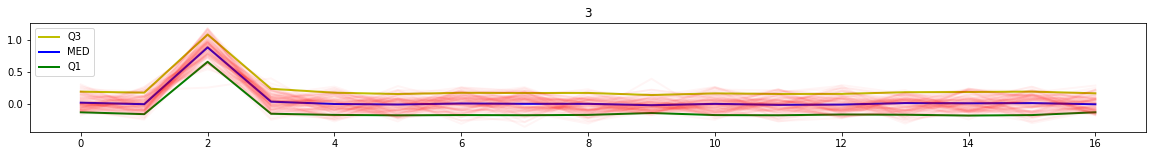

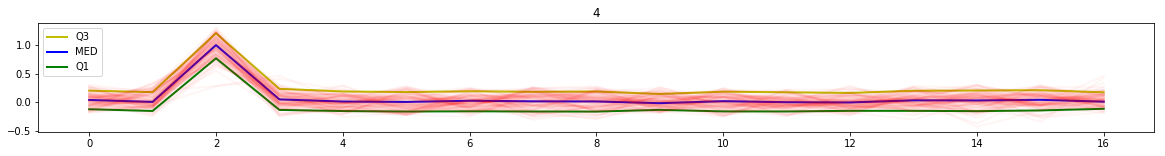

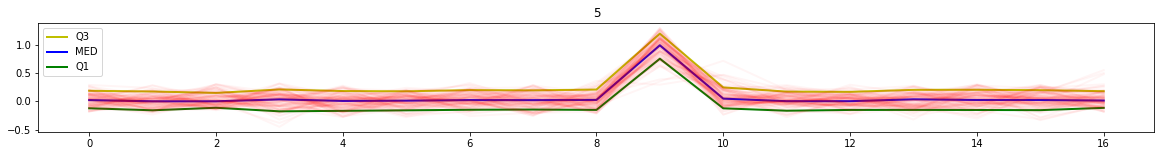

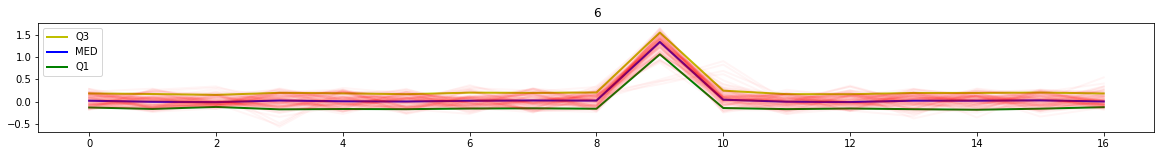

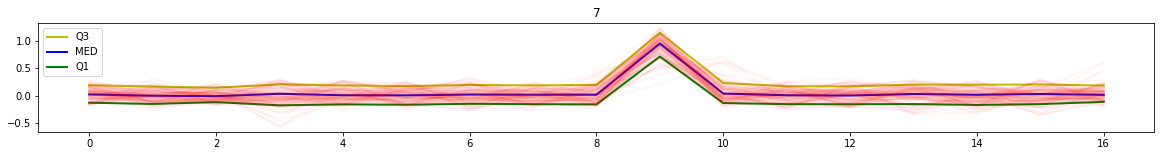

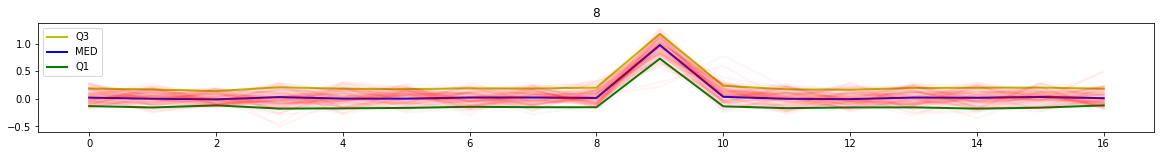

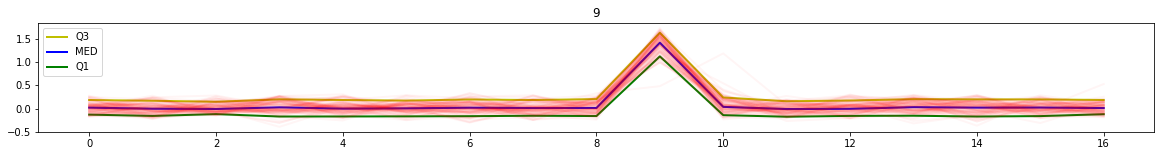

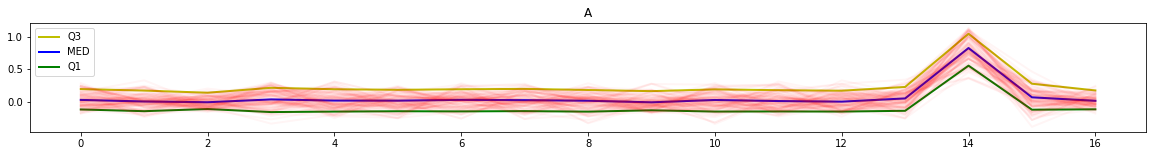

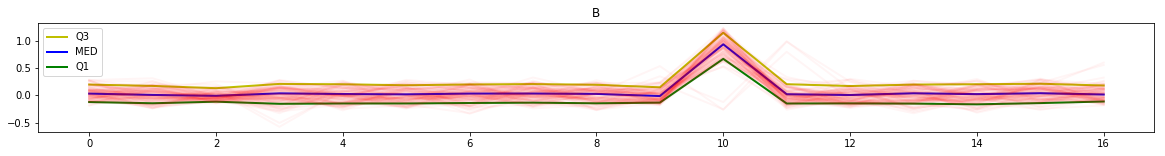

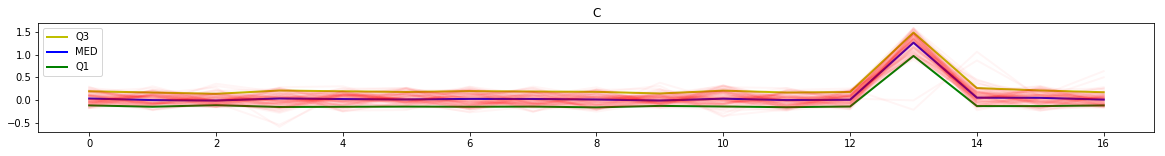

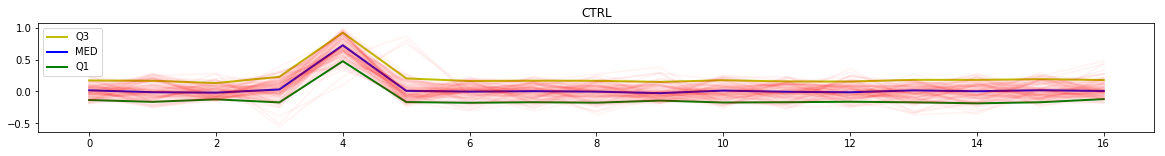

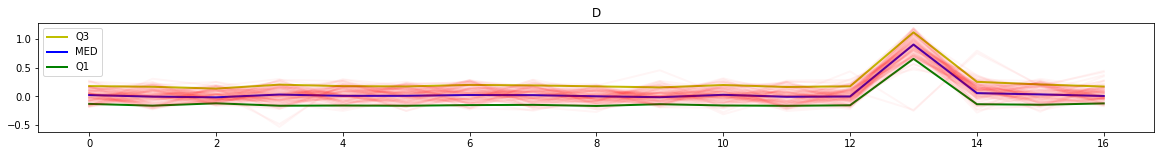

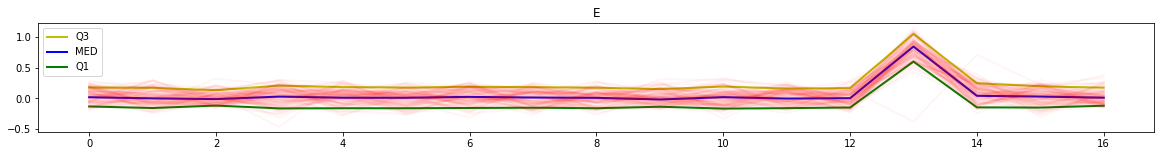

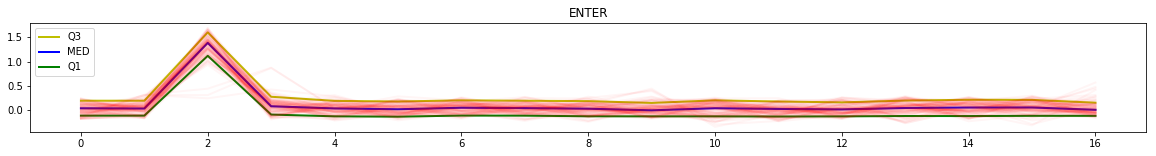

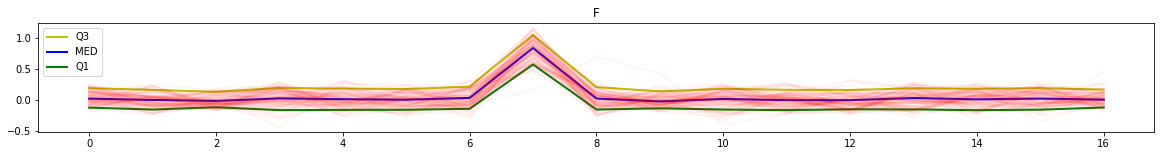

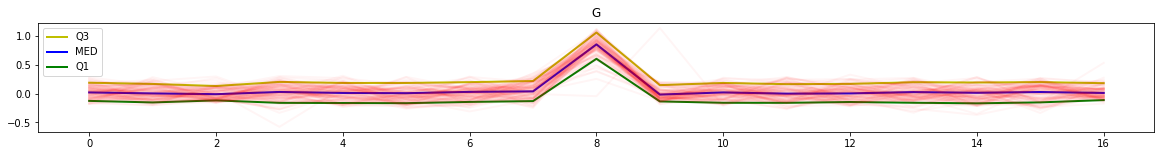

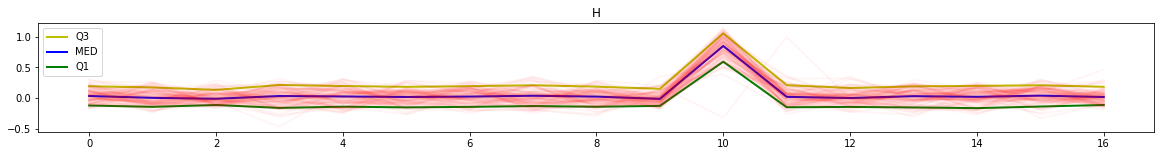

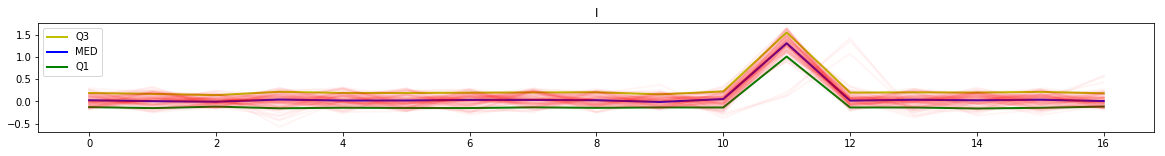

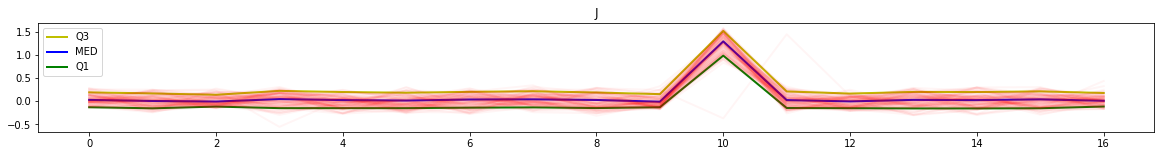

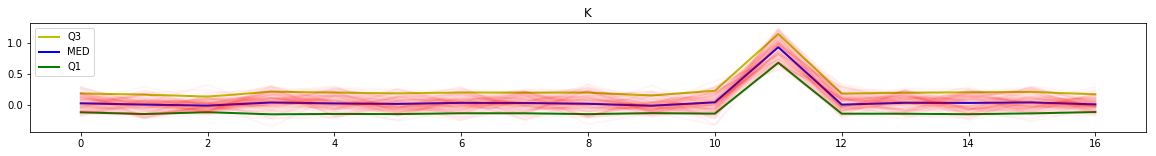

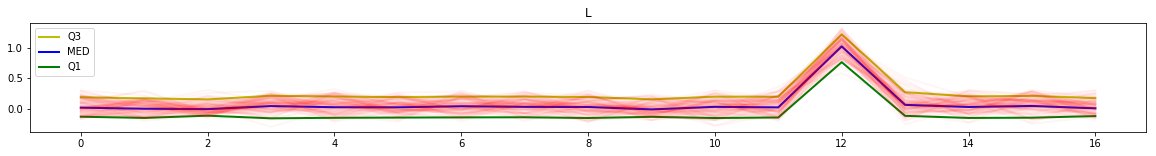

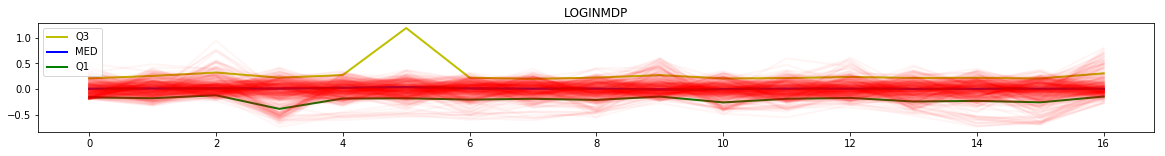

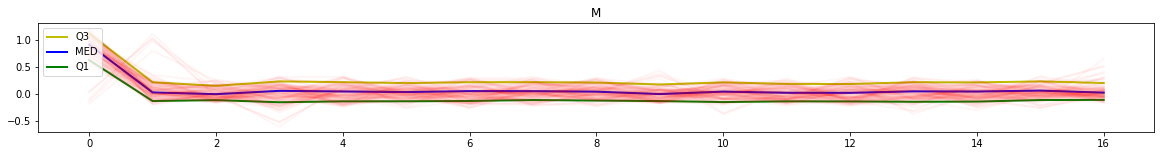

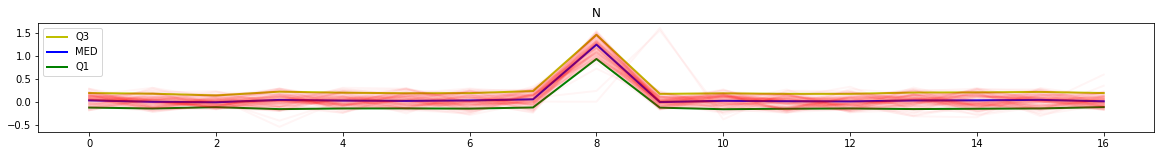

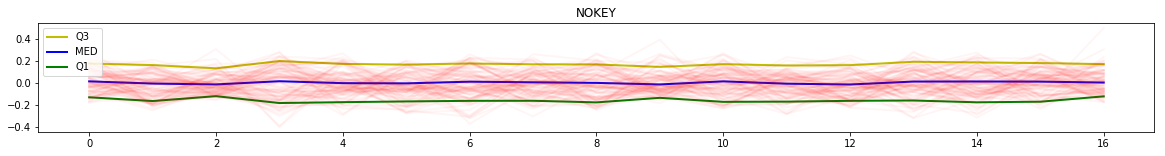

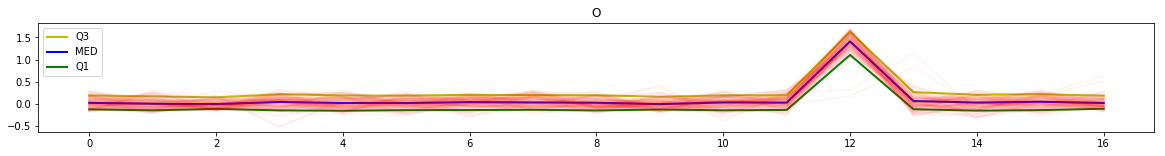

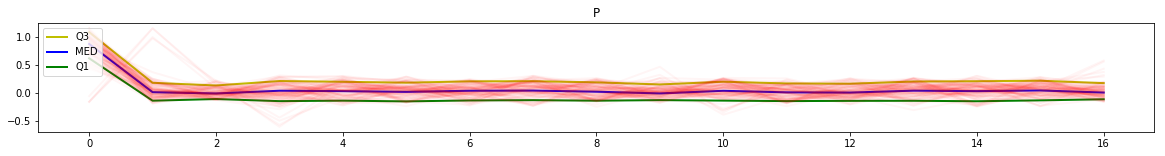

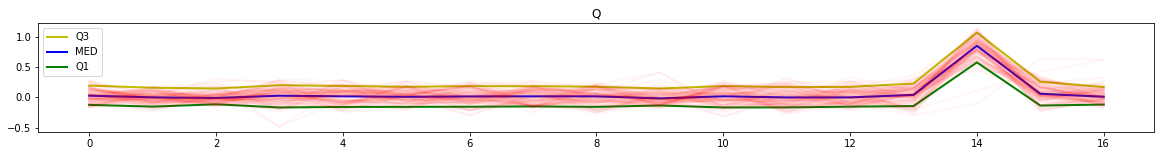

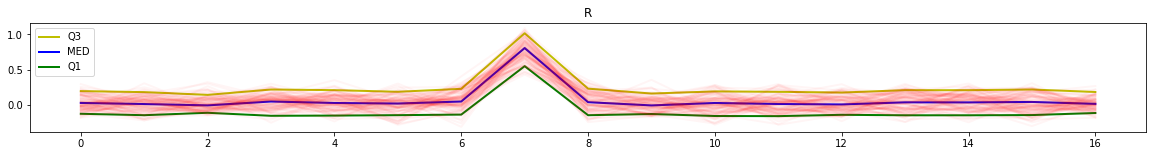

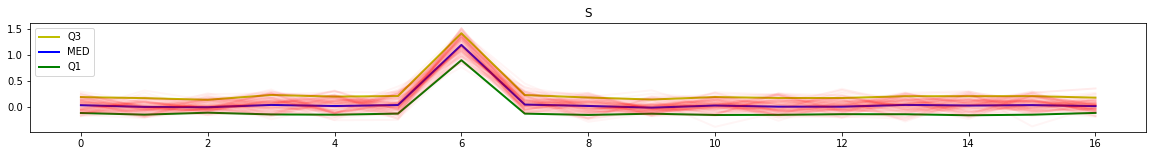

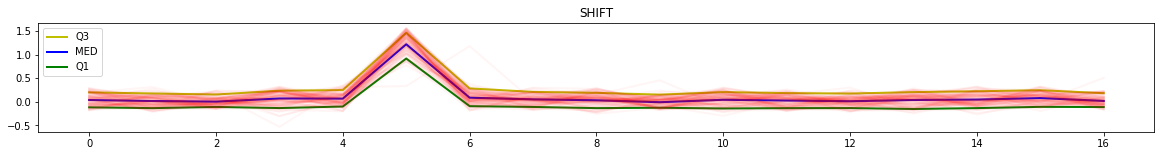

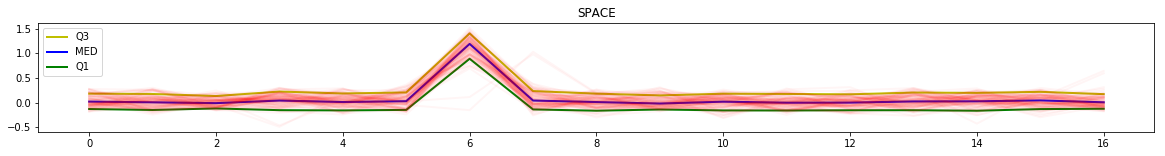

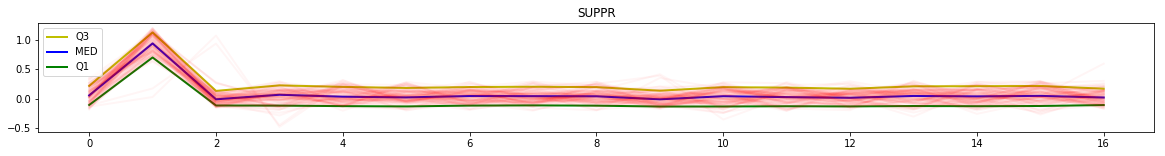

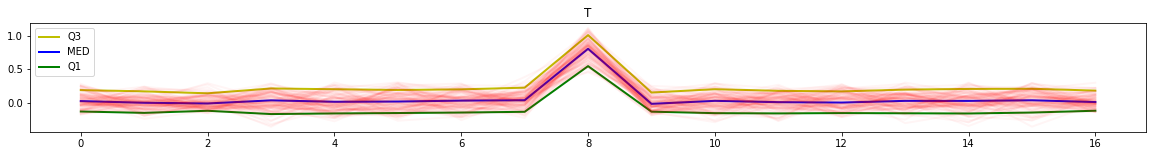

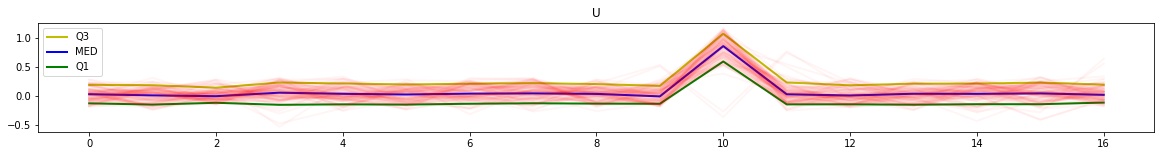

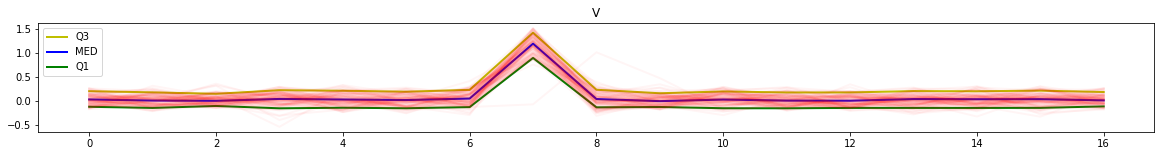

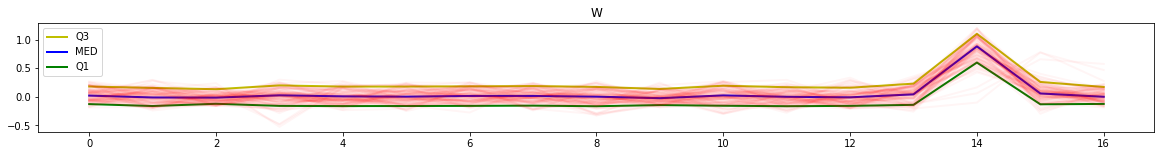

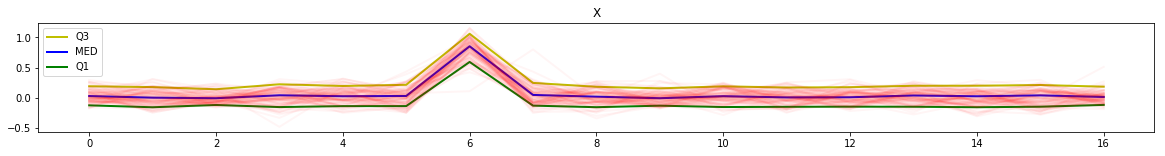

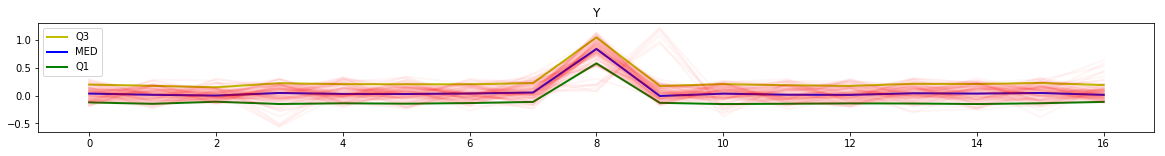

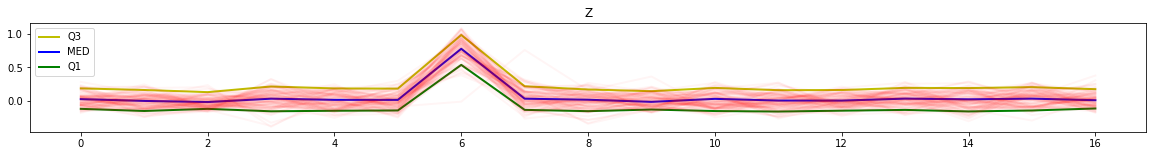

In [185]:
# THIS CELL IS FOR DESCRIBING DATA

# Set the environment display parameters
mpl.rcParams['figure.figsize'] = 20, 2
mpl.rcParams['lines.linewidth'] = 2
np.random.seed(42)

count = 0
for df_dict in pics_dict.keys():
    count += 1
    
    kalman_array = np.array(pics_dict[df_dict].iloc[:100,:17])
    if df_dict == "LOGINMDP":
        kalman_array = np.array(pics_dict[df_dict].iloc[:400,:17])
        

    plt.plot(np.quantile(pics_dict[df_dict].iloc[:,:17], 0.9, axis=0), '-y', label='Q3') 
    plt.plot(np.quantile(pics_dict[df_dict].iloc[:,:17], 0.5, axis=0), '-b', label='MED') 
    plt.plot(np.quantile(pics_dict[df_dict].iloc[:,:17], 0.1, axis=0), '-g', label='Q1') 
    plt.legend(loc='upper left')

    for i in range(len(kalman_array)):
        measurements = kalman_array[i,:]
        plt.plot(measurements, '-r', label='', alpha=0.04)

#         kf = KalmanFilter(transition_matrices=[1],
#                           observation_matrices=[1],
#                           initial_state_mean=measurements[0],
#                           initial_state_covariance=1,
#                           observation_covariance=5,
#                           transition_covariance=1) 
#         state_means, state_covariances = kf.filter(measurements) 
        
#         plt.plot(measurements, '-r', label='', alpha=0.02) 
#         plt.plot(state_means, '-g', label='', alpha=0.04) 

#             if i == len(kalman_array):
#                 plt.plot(measurements, '-r', label='measurement', alpha=0.04) 
#             plt.plot(state_means, '-g', label='kalman-filter output', alpha=0.04) 

    plt.title('{}'.format(df_dict))
    plt.show()

    # Set the environment display parameters
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2
np.random.seed(42)


__EDA & Clustering__

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

PCA analysis

In [187]:
model = PCA(n_components=4)
model.fit(allpics_df.iloc[:,:-1])
x_pca = model.transform(allpics_df.iloc[:,:-1])

Text(0, 0.5, 'Cout du modele (Inertia)')

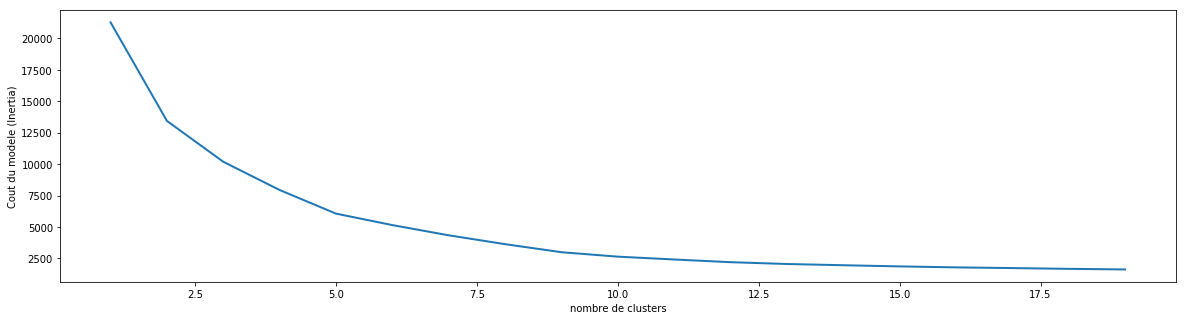

In [188]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(x_pca)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

-4341.590118827297

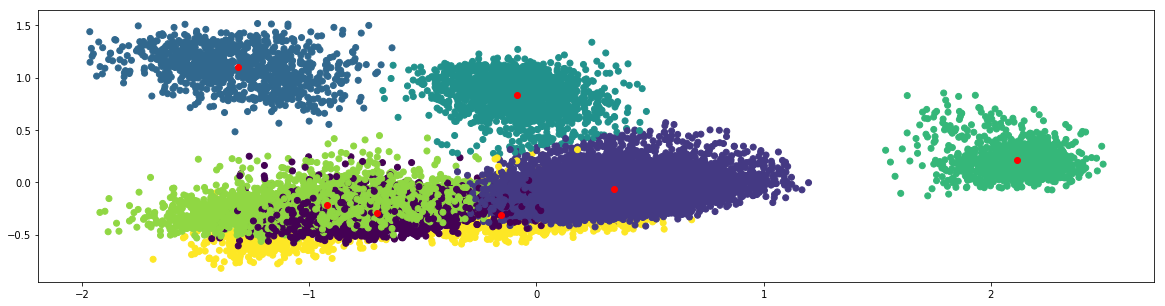

In [189]:
model = KMeans(n_clusters=7)
model.fit(x_pca)
model.predict(x_pca)
plt.scatter(x_pca[:,0], x_pca[:,1], c=model.predict(x_pca))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(x_pca)

Detection des anomalies

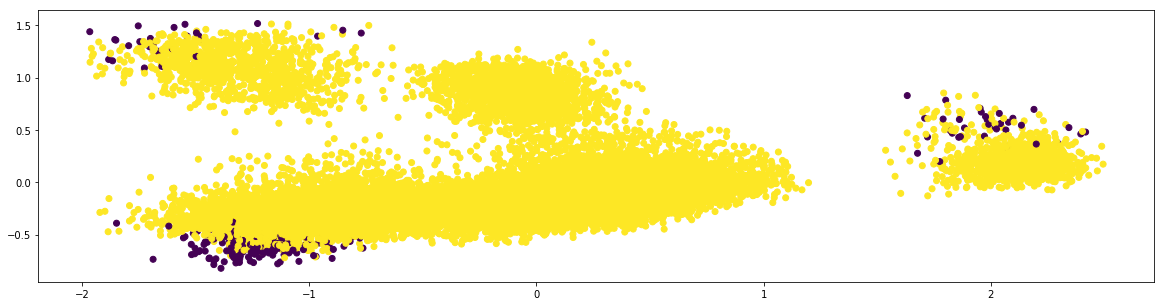

In [190]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
model.fit(x_pca)

plt.scatter(x_pca[:,0], x_pca[:, 1], c=model.predict(x_pca))

__Preprocessing__


In [200]:
model_pics_df = allpics_df[allpics_df['KEY_PRESSED'] != 'LOGINMDP']

In [192]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV

# Apply the min max scaler
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
normalizer = preprocessing.Normalizer()

transformer = standard_scaler

x_scaled = transformer.fit_transform(model_pics_df.iloc[:,:-1])

scaled_features = pd.DataFrame(x_scaled, index=model_pics_df.iloc[:,:-1].index)

# Label Encoder
le = preprocessing.LabelEncoder()
scaled_features['KEY_PRESSED'] = le.fit_transform(model_pics_df['KEY_PRESSED'])

__Train test split__

In [201]:
# Define the name of fatures and target variables
print(model_pics_df.columns)


features_names = model_pics_df.columns[:-1].unique()
y_names = model_pics_df.columns[-1]

df_model_raw = model_pics_df # Define your df
    
model_pics_df[y_names] = le.fit_transform(df_model_raw['KEY_PRESSED'])

# Shuffle the sataset
df_model = model_pics_df.sample(frac=1).reset_index(drop=True)


print('\n features name: ', features_names)
print('y name: ', y_names)
print('\n y cat: ', df_model_raw[y_names].unique())
df_model.iloc[[0,1,-2,-1],:]

Index([          '0',           '1',           '2',           '3',
                 '4',           '5',           '6',           '7',
                 '8',           '9',          '10',          '11',
                '12',          '13',          '14',          '15',
                '16',   'max_pic_1',   'max_pic_2',   'max_pic_3',
         'max_pic_4',   'max_pic_5',   'max_pic_6',   'max_pic_7',
         'max_pic_8',             0,             1, 'KEY_PRESSED'],
      dtype='object')

 features name:  Index([        '0',         '1',         '2',         '3',         '4',
               '5',         '6',         '7',         '8',         '9',
              '10',        '11',        '12',        '13',        '14',
              '15',        '16', 'max_pic_1', 'max_pic_2', 'max_pic_3',
       'max_pic_4', 'max_pic_5', 'max_pic_6', 'max_pic_7', 'max_pic_8',
                 0,           1],
      dtype='object')
y name:  KEY_PRESSED

 y cat:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0         1         2         3         4         5         6  \
0       0.007324 -0.067139  0.990601  0.164185  0.076294  0.040894 -0.007935   
1       0.081787  0.023193  0.057373  0.101929 -0.204468  0.252075  0.029907   
119278 -0.071411  0.125122  0.057983 -0.175171 -0.034180 -0.081787 -0.009155   
119279  0.095215 -0.120850 -0.006714  0.269775  0.360107  0.173950 -0.111084   

               7         8         9  ...  max_pic_2  max_pic_3  max_pic_4  \
0       0.006104  0.185547 -0.040283  ...   0.675049   0.753174   0.776978   
1       0.123901  0.162354 -0.088501  ...   1.648560   1.202393   1.323853   
119278  0.135498 -0.258789 -0.055542  ...   0.773315   1.090698   0.950317   
119279 -0.156250  0.027466  0.036621  ...   0.399780   0.678711   0.628662   

        max_pic_5  max_pic_6  max_pic_7  max_pic_8         0         1  \
0        1.037598   0.865479   0.707397   0.967407  0.990601 -0.133667   
1        1.160889   1.408691   1.627808   1.493530  1.241455 -0.204468   
119278   1.083374   1.210938   0.704956   0.845337  0.833740 -0.258789   
119279   0.636597   0.916138   0.909424   0.735474  0.360107 -0.156250   

        KEY_PRESSED  
0                 2  
1                27  
119278           38  
119279           13  

[4 rows x 28 columns]

In [202]:
# Definition of the target and features
model_features = (df_model[features_names])
targets = df_model[y_names]

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.70 * model_features.shape[0])
train_features = X = model_features[:train_size]
train_targets  = Y = targets[:train_size]
test_features  = x = model_features[train_size:]
test_targets   = y = targets[train_size:]

print(model_features.shape, train_targets.shape, train_features.shape)
print(targets.shape, test_targets.shape, test_features.shape)

print(train_features.index[0], train_features.index[-1])
print(test_features.index[0], test_features.index[-1])

(119280, 27) (83496,) (83496, 27)
(119280,) (35784,) (35784, 27)
0 83495
83496 119279


__Feature Selection__

Optimal number of features : 27


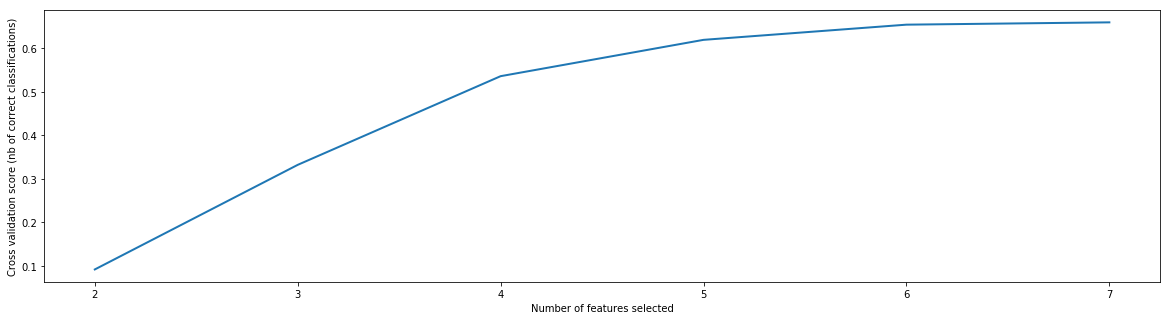

In [195]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=5, cv=StratifiedKFold(4),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [203]:
model_features = df_model[features_names].iloc[:,rfecv.get_support(indices=True)]
model_features

0         1         2         3         4         5         6  \
0       0.007324 -0.067139  0.990601  0.164185  0.076294  0.040894 -0.007935   
1       0.081787  0.023193  0.057373  0.101929 -0.204468  0.252075  0.029907   
2      -0.081787 -0.161133 -0.046387  0.053711  0.048218  0.147095  0.210571   
3       0.126343  0.759888  0.061035  0.134277 -0.100708 -0.208740 -0.147705   
4       0.113525 -0.091553  0.012207  0.018311 -0.042725  0.070801 -0.089111   
...          ...       ...       ...       ...       ...       ...       ...   
119275 -0.010376  0.087891 -0.080566  0.039062  0.109863  0.148315  0.544434   
119276 -0.126343  0.166626  0.127563 -0.102539 -0.095825  0.130615 -0.023804   
119277  0.022583  0.130005  0.070190  0.015259 -0.187988  0.214844  0.183105   
119278 -0.071411  0.125122  0.057983 -0.175171 -0.034180 -0.081787 -0.009155   
119279  0.095215 -0.120850 -0.006714  0.269775  0.360107  0.173950 -0.111084   

               7         8         9  ...  max_pic_1  max_pic_2  max_pic_3  \
0       0.006104  0.185547 -0.040283  ...   0.778198   0.675049   0.753174   
1       0.123901  0.162354 -0.088501  ...   1.610107   1.648560   1.202393   
2       0.065308  0.067139  0.109863  ...   1.139526   0.743408   0.663452   
3       0.224609  0.035400 -0.184937  ...   0.879517   0.695801   0.939331   
4      -0.005493  0.196533  1.027832  ...   1.334229   1.445312   1.317139   
...          ...       ...       ...  ...        ...        ...        ...   
119275  0.126343  0.021973 -0.126953  ...   0.689697   1.092529   0.838623   
119276 -0.025024  0.002441  0.112305  ...   1.499634   1.527710   1.367188   
119277 -0.070190 -0.093384 -0.125122  ...   0.991211   1.195679   1.298218   
119278  0.135498 -0.258789 -0.055542  ...   0.866089   0.773315   1.090698   
119279 -0.156250  0.027466  0.036621  ...   0.437622   0.399780   0.678711   

        max_pic_4  max_pic_5  max_pic_6  max_pic_7  max_pic_8         0  \
0        0.776978   1.037598   0.865479   0.707397   0.967407  0.990601   
1        1.323853   1.160889   1.408691   1.627808   1.493530  1.241455   
2        1.140747   1.163330   0.756226   0.988770   1.068115  1.075439   
3        0.867920   0.691528   0.949097   1.040039   0.863647  0.759888   
4        1.457520   1.193237   1.186523   1.484985   1.733398  1.027832   
...           ...        ...        ...        ...        ...       ...   
119275   0.963135   0.859985   0.479736   1.055298   0.434570  0.544434   
119276   1.318970   1.085815   1.524048   1.478882   1.530762  1.643677   
119277   1.350708   1.290283   1.595459   1.247559   1.560669  1.535645   
119278   0.950317   1.083374   1.210938   0.704956   0.845337  0.833740   
119279   0.628662   0.636597   0.916138   0.909424   0.735474  0.360107   

               1  
0      -0.133667  
1      -0.204468  
2      -0.161133  
3      -0.246582  
4      -0.120850  
...          ...  
119275 -0.126953  
119276 -0.135498  
119277 -0.187988  
119278 -0.258789  
119279 -0.156250  

[119280 rows x 27 columns]

In [204]:
# Definition of the target and features
model_features = df_model[features_names].iloc[:,rfecv.get_support(indices=True)]
targets = df_model[y_names]

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.70 * model_features.shape[0])
train_features = X = model_features[:train_size]
train_targets  = Y = targets[:train_size]
test_features  = x = model_features[train_size:]
test_targets   = y = targets[train_size:]

print(model_features.shape, train_targets.shape, train_features.shape)
print(targets.shape, test_targets.shape, test_features.shape)

print(train_features.index[0], train_features.index[-1])
print(test_features.index[0], test_features.index[-1])

(119280, 27) (83496,) (83496, 27)
(119280,) (35784,) (35784, 27)
0 83495
83496 119279


__Pipeline__

In [205]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Apply the min max scaler
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
normalizer = preprocessing.Normalizer()
transformer = standard_scaler

model_pipe = make_pipeline(PolynomialFeatures(), transformer, SGDClassifier(n_jobs=4))
model_pipe
params = {
    'polynomialfeatures__degree' : [1],
    'sgdclassifier__alpha':[0.001],
    'sgdclassifier__penalty' : ['l1'],
    'sgdclassifier__shuffle' : [True],
    'sgdclassifier__fit_intercept' : [True],
    'sgdclassifier__learning_rate' :['optimal'],
    'sgdclassifier__loss' : ['hinge']
    
}

grid = GridSearchCV(model_pipe, param_grid=params, cv=4)
grid.fit(X, Y)
print(grid.best_params_)

{'polynomialfeatures__degree': 1, 'sgdclassifier__alpha': 0.001, 'sgdclassifier__fit_intercept': True, 'sgdclassifier__learning_rate': 'optimal', 'sgdclassifier__loss': 'hinge', 'sgdclassifier__penalty': 'l1', 'sgdclassifier__shuffle': True}


In [206]:
print('The accuracy of the Knn classifier on training data is {:.5f}'.format(grid.score(X, Y)))
print('The accuracy of the Knn classifier on test data is {:.5f}'.format(grid.score(x, y)))

The accuracy of the Knn classifier on training data is 0.57781
The accuracy of the Knn classifier on test data is 0.57132


In [236]:
import numpy as np
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rng = np.random.RandomState(0)

clf = RandomForestClassifier(random_state=rng, n_jobs=-1)

param_dist = {"n_estimators": [500, 600, 700, 800, 900, 1000, 1100],
                "max_depth": [12, 13, 14, 15, 16, 17],
                "bootstrap": [False],
                "criterion": ["gini"]}

rsh = HalvingRandomSearchCV(estimator=clf, param_distributions=param_dist,
                            factor=4, random_state=rng, cv=4)
rsh.fit(X, Y)
rsh.best_params_

print('The accuracy of the Knn classifier on training data is {:.5f}'.format(rsh.score(X, Y)))
print('The accuracy of the Knn classifier on test data is {:.5f}'.format(rsh.score(x, y)))

# The accuracy of the classifier on training data is 0.83238
# The accuracy of the classifier on test data is 0.50524
# RandomForestClassifier('n_estimators': 600, 'max_depth': 12, 'criterion': 'gini', 'bootstrap': False)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 42 is smaller than n_iter=248. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The accuracy of the Knn classifier on training data is 0.82040
The accuracy of the Knn classifier on test data is 0.68536


In [238]:
rsh.best_params_

{'n_estimators': 600, 'max_depth': 16, 'criterion': 'gini', 'bootstrap': False}

In [239]:
print('The accuracy of the RFC classifier on training data is {:.5f}'.format(rsh.score(X, Y)))
print('The accuracy of the RFC classifier on test data is {:.5f}'.format(rsh.score(x, y)))

The accuracy of the RFC classifier on training data is 0.82040
The accuracy of the RFC classifier on test data is 0.68536


__Predicting LOGINMDP__

In [240]:
pd.DataFrame(pics_loginmdp)

0         1         2         3         4         5         6  \
0      0.475464  0.427246  0.170898  0.372925  0.518188  0.606079  0.651245   
1      0.413818  0.374756  0.335693  0.303345  0.311890  0.270996  0.288696   
2      0.509644  0.644531  0.378418  0.777588  0.656128  0.751343  0.961304   
3      0.656128  0.575562  0.357666  0.618286  0.702515  0.728760  0.831909   
4      0.867920  0.630493  0.285034  0.828857  0.705566  0.665283  0.707397   
...         ...       ...       ...       ...       ...       ...       ...   
11096  0.756226  0.311279  0.129395  1.001587  0.915527  0.604858  0.763550   
11097  0.784912  0.386963  0.299072  0.776367  0.705566  0.782471  0.625610   
11098  0.421753  0.338135  0.209961  0.852661  0.504761  0.714111  0.606079   
11099  0.687256  0.426025  0.302734  0.842896  0.886841  0.487671  0.554810   
11100  0.651245  0.288696  0.398560  0.710449  0.584717  0.540161  0.676270   

              7         8         9        10        11        12        13  \
0      0.672607  0.525513  0.288696  0.426025  0.468750  0.356445  0.515747   
1      0.487671  0.297241  0.308228  0.182495  0.281372  0.379028  0.189819   
2      0.701904  0.604248  0.539551  0.693970  0.656128  0.293579  0.693970   
3      0.664673  0.598755  0.242310  0.749512  0.644531  0.565796  0.686646   
4      0.793457  0.609741  0.374146  0.605469  0.872192  0.471802  0.693970   
...         ...       ...       ...       ...       ...       ...       ...   
11096  0.552368  0.424805  0.318604  0.548096  0.497437  0.576782  0.661011   
11097  0.632324  0.396729  0.331421  0.555420  0.523071  0.225220  0.664062   
11098  0.713501  0.852051  0.292969  0.739136  0.633545  0.250244  0.786743   
11099  0.668335  0.735474  0.232544  0.588989  0.613403  0.618286  0.511475   
11100  0.650635  0.618286  0.134277  0.754395  0.795288  0.243530  0.730591   

             14        15        16  
0      0.697021  0.552979  0.270996  
1      0.192871  0.299072  0.209961  
2      0.854492  1.032104  0.337524  
3      0.719604  0.899658  0.294800  
4      0.916748  0.592041  0.637207  
...         ...       ...       ...  
11096  0.855713  0.997314  0.202637  
11097  1.009521  0.717773  0.049438  
11098  0.817261  0.408325  0.261230  
11099  0.503540  0.890503  0.399780  
11100  0.769043  0.805054  0.264893  

[11101 rows x 17 columns]

In [241]:
file_df_lagged_LOGINMDP = pics_dict['LOGINMDP']
predict_df = file_df_lagged_LOGINMDP.iloc[:,rfecv.get_support(indices=True)]
predict_df

0         1         2         3         4         5         6  \
8     -0.056763 -0.082397 -0.057373  0.120850 -0.009155  0.007935  0.006104   
9      0.059204  0.160522  0.053711 -0.091553 -0.018921  0.145264  0.067139   
10    -0.028687 -0.101318 -0.015869  0.175781 -0.192261 -0.076294  0.015259   
11     0.099487  0.064697 -0.007324 -0.246582 -0.166626 -0.042725  0.025024   
12    -0.188599  0.146484  0.111084 -0.372314  0.056763 -0.078735 -0.099487   
...         ...       ...       ...       ...       ...       ...       ...   
11096  0.156250 -0.125122 -0.127563  0.228271  0.223999 -0.025024  0.078735   
11097  0.184937 -0.049438  0.042114  0.003052  0.014038  0.152588 -0.059204   
11098 -0.178223 -0.098267 -0.046997  0.079346 -0.186768  0.084229 -0.078735   
11099  0.087280 -0.010376  0.045776  0.069580  0.195312 -0.142212 -0.130005   
11100  0.051270 -0.147705  0.141602 -0.062866 -0.106812 -0.089722 -0.008545   

              7         8         9  ...  max_pic_1  max_pic_2  max_pic_3  \
8      0.055542  0.037231  0.065308  ...   0.234375   0.339355   0.441284   
9     -0.264282 -0.279541  0.103760  ...   0.360107   0.234375   0.339355   
10    -0.191040 -0.088501  0.048828  ...   0.160522   0.360107   0.234375   
11     0.046387  0.183105  0.077515  ...   0.351562   0.160522   0.360107   
12     0.101318 -0.045776  0.516357  ...   0.245361   0.351562   0.160522   
...         ...       ...       ...  ...        ...        ...        ...   
11096 -0.108032 -0.199585  0.021362  ...   0.319824   0.540771  -0.040283   
11097 -0.028076 -0.227661  0.034180  ...   0.236816   0.319824   0.540771   
11098  0.053101  0.227661 -0.004272  ...   0.249023   0.236816   0.319824   
11099  0.007935  0.111084 -0.064697  ...   0.227661   0.249023   0.236816   
11100 -0.009766 -0.006104 -0.162964  ...   0.214844   0.227661   0.249023   

       max_pic_4  max_pic_5  max_pic_6  max_pic_7  max_pic_8         0  \
8       0.357056   0.164795   0.276489   0.078735   0.012207  0.360107   
9       0.441284   0.357056   0.164795   0.276489   0.078735  0.160522   
10      0.339355   0.441284   0.357056   0.164795   0.276489  0.351562   
11      0.234375   0.339355   0.441284   0.357056   0.164795  0.245361   
12      0.360107   0.234375   0.339355   0.441284   0.357056  0.700073   
...          ...        ...        ...        ...        ...       ...   
11096   0.210571   0.234985   0.221558   0.521851   0.288696  0.236816   
11097  -0.040283   0.210571   0.234985   0.221558   0.521851  0.249023   
11098   0.540771  -0.040283   0.210571   0.234985   0.221558  0.227661   
11099   0.319824   0.540771  -0.040283   0.210571   0.234985  0.214844   
11100   0.236816   0.319824   0.540771  -0.040283   0.210571  0.241089   

              1  
8     -0.144043  
9     -0.279541  
10    -0.192261  
11    -0.246582  
12    -0.372314  
...         ...  
11096 -0.199585  
11097 -0.230713  
11098 -0.352173  
11099 -0.256958  
11100 -0.162964  

[11093 rows x 27 columns]

In [242]:
# Predict key pressed
# predictions = grid.predict(predict_df)
predictions = rsh.predict(predict_df)

key_found_rsh = pd.Series(le.inverse_transform(predictions))
key_found_rsh.to_csv('key_found_rsh.csv')

print(key_found_rsh)
print(np.unique(np.array(key_found_rsh.values)))

0        NOKEY
1        NOKEY
2        NOKEY
3        NOKEY
4        NOKEY
         ...  
11088    NOKEY
11089    NOKEY
11090    NOKEY
11091    NOKEY
11092    NOKEY
Length: 11093, dtype: object
['0' '1' '2' '3' '4' '6' '7' '8' '9' 'A' 'B' 'C' 'CTRL' 'D' 'E' 'ENTER'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'NOKEY' 'O' 'P' 'Q' 'R' 'S' 'SHIFT'
 'SPACE' 'SUPPR' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [243]:
# Predict key pressed
predictions = grid.predict(predict_df)

key_found_grid = pd.Series(le.inverse_transform(predictions))
key_found_grid.to_csv('key_found_grid.csv')

print(key_found_grid)
print(np.unique(np.array(key_found_grid.values)))

0        NOKEY
1        NOKEY
2        NOKEY
3            U
4        NOKEY
         ...  
11088    NOKEY
11089    NOKEY
11090    NOKEY
11091    NOKEY
11092        K
Length: 11093, dtype: object
['0' '1' '2' '3' '4' '5' '6' '7' '9' 'A' 'B' 'C' 'CTRL' 'D' 'E' 'ENTER'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'NOKEY' 'O' 'P' 'Q' 'R' 'S' 'SHIFT'
 'SPACE' 'SUPPR' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [244]:
both_model = pd.concat([key_found_grid, key_found_rsh], axis=1)

both_model
both_model.to_csv('key_found_both_model.csv')

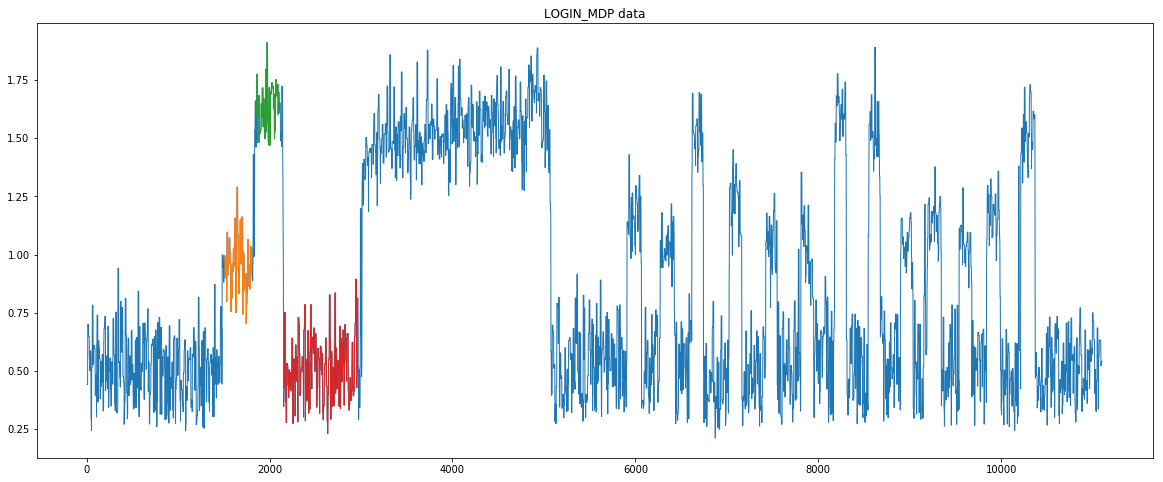

In [245]:
pics_dict['LOGINMDP'].max(axis=1).plot(title='LOGIN_MDP data')

# Add lags values    
ctrl_pressed = pics_dict['LOGINMDP'].max(axis=1)[1500:1800]
ctrl_pressed.plot()

# Add lags values    
ctrl_alt_pressed = pics_dict['LOGINMDP'].max(axis=1)[1850:2100]
ctrl_alt_pressed.plot()

# Add lags values    
login_pressed = pics_dict['LOGINMDP'].max(axis=1)[2150:2950]
login_pressed.plot()

In [331]:
predictions = grid.predict(predict_df)

key_found_selected = pd.Series(le.inverse_transform(predictions))
key_found_selected.to_csv('key_found_selected_grid.csv')

print(key_found_selected)
print(np.unique(np.array(key_found_selected.values)))

from collections import Counter
probable_key = []
for i in range(5, len(key_found_selected.values)):
    last_i_charac = key_found_selected.values[i-5:i]
    
    c = Counter(last_i_charac)
    c.most_common()
    value, count = c.most_common()[0]

    probable_key.append(value)

character_chain = []
for i in range(1, len(probable_key)):
    if probable_key[i] != probable_key[i-1]:
        character_chain.append(probable_key[i])


0        NOKEY
1        NOKEY
2        NOKEY
3            U
4        NOKEY
         ...  
11088    NOKEY
11089    NOKEY
11090    NOKEY
11091    NOKEY
11092        K
Length: 11093, dtype: object
['0' '1' '2' '3' '4' '5' '6' '7' '9' 'A' 'B' 'C' 'CTRL' 'D' 'E' 'ENTER'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'NOKEY' 'O' 'P' 'Q' 'R' 'S' 'SHIFT'
 'SPACE' 'SUPPR' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [332]:
predictions = rsh.predict(predict_df)

key_found_selected = pd.Series(le.inverse_transform(predictions))
key_found_selected.to_csv('key_found_selected_grid.csv')

print(key_found_selected)
print(len(np.unique(np.array(key_found_selected.values))),np.unique(np.array(key_found_selected.values)))


from collections import Counter
probable_key = []
for i in range(80, len(key_found_selected.values)):
    last_i_charac = key_found_selected.values[i-80:i]
    
    c = Counter(last_i_charac)
    c.most_common()
    value, count = c.most_common()[0]

    probable_key.append(value)

print("probable key \n", probable_key)

print(len(probable_key))

0        NOKEY
1        NOKEY
2        NOKEY
3        NOKEY
4        NOKEY
         ...  
11088    NOKEY
11089    NOKEY
11090    NOKEY
11091    NOKEY
11092    NOKEY
Length: 11093, dtype: object
41 ['0' '1' '2' '3' '4' '6' '7' '8' '9' 'A' 'B' 'C' 'CTRL' 'D' 'E' 'ENTER'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'NOKEY' 'O' 'P' 'Q' 'R' 'S' 'SHIFT'
 'SPACE' 'SUPPR' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
probable key 
 ['NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'N

In [333]:
# UGLY CODE, I KNOW BUT IT WORKS

character_chain = []
remove_elements = ['CTRL', 'SHIFT', 'SUPPR']

for i in range(1, len(probable_key)):
    if probable_key[i] != probable_key[i-1] and probable_key[i] not in remove_elements:
        character_chain.append(probable_key[i])

from itertools import groupby
i = (list(g) for _, g in groupby(character_chain, key='NOKEY'.__ne__))
list_a = [a + b for a, b in zip(i, i)]

list_1 = []
for i in range(len(list_a)):
    list_2 = []
    for j in range(len(list_a[i])):
        if list_a[i][j] != "NOKEY":
            list_2.append(list_a[i][j])
    
    list_1.append(list(np.unique(np.array(list_2))))   

list_1[-13:]

[['B', 'H'],
 ['A', 'Q'],
 ['C'],
 ['K'],
 ['A'],
 ['G', 'T'],
 ['O'],
 ['N'],
 ['2'],
 ['0'],
 ['2'],
 ['2', '4'],
 ['ENTER']]

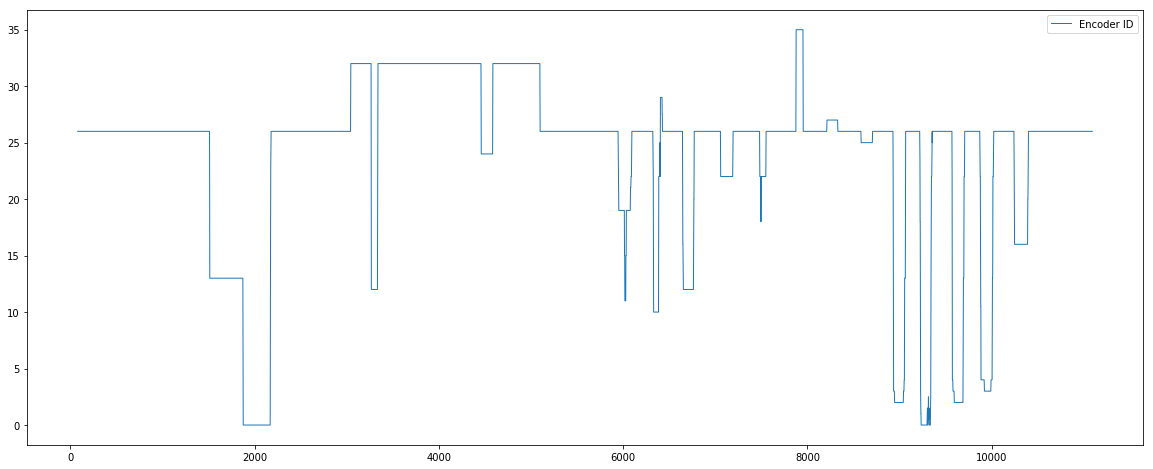

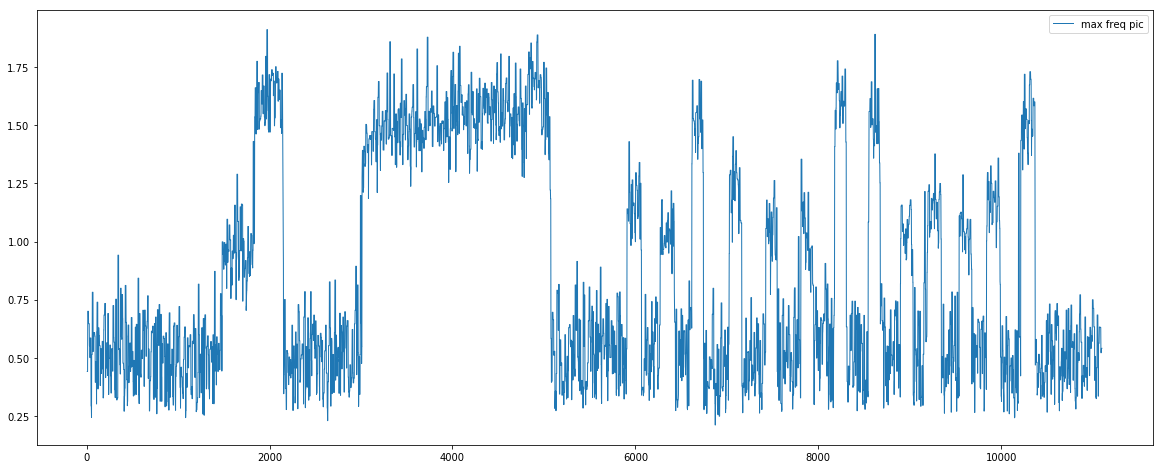

In [336]:
label_encoder = predictions

label_encoder_df = pd.DataFrame(label_encoder, columns=['Encoder ID']).rolling(80).median()
max_freq_pic = pd.DataFrame(predict_df.max(axis=1), columns=['max freq pic'])
label_encoder_df.plot()
max_freq_pic.plot()
# plot_df = pd.concat([label_encoder_df, max_freq_pic], axis=1)



# ax = plot_df.plot('INDEX','Encoder ID')
# ax1 = ax.twinx()
# plot_df.plot('INDEX','max freq pic',ax=ax1, color='r')

In [337]:
predictions = grid.predict(predict_df)

key_found_selected = pd.Series(le.inverse_transform(predictions))
key_found_selected.to_csv('key_found_selected_grid.csv')

print(key_found_selected)
print(len(np.unique(np.array(key_found_selected.values))),np.unique(np.array(key_found_selected.values)))

key_found = key_found_grid

from collections import Counter
probable_key = []
for i in range(80, len(key_found.values)):
    last_i_charac = key_found.values[i-80:i]
    
    c = Counter(last_i_charac)
    c.most_common()
    value, count = c.most_common()[0]

    probable_key.append(value)

print("probable key \n", probable_key)

print(len(probable_key))

0        NOKEY
1        NOKEY
2        NOKEY
3            U
4        NOKEY
         ...  
11088    NOKEY
11089    NOKEY
11090    NOKEY
11091    NOKEY
11092        K
Length: 11093, dtype: object
41 ['0' '1' '2' '3' '4' '5' '6' '7' '9' 'A' 'B' 'C' 'CTRL' 'D' 'E' 'ENTER'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'NOKEY' 'O' 'P' 'Q' 'R' 'S' 'SHIFT'
 'SPACE' 'SUPPR' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
probable key 
 ['NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'NOKEY', 'N

In [329]:
# UGLY CODE, I KNOW BUT IT WORKS

character_chain = []
remove_elements = ['CTRL', 'SHIFT', 'SUPPR']

for i in range(1, len(probable_key)):
    if probable_key[i] != probable_key[i-1] and probable_key[i] not in remove_elements:
        character_chain.append(probable_key[i])

from itertools import groupby
i = (list(g) for _, g in groupby(character_chain, key='NOKEY'.__ne__))
list_a = [a + b for a, b in zip(i, i)]

list_1 = []
for i in range(len(list_a)):
    list_2 = []
    for j in range(len(list_a[i])):
        if list_a[i][j] != "NOKEY":
            list_2.append(list_a[i][j])
    
    list_1.append(list(np.unique(np.array(list_2))))   

list_1[-13:]

[['H'],
 ['W'],
 ['C'],
 ['K'],
 ['W'],
 ['G'],
 ['O'],
 ['N'],
 ['2', '4'],
 ['0'],
 ['2', '4'],
 ['2', '4'],
 ['4', 'ENTER']]

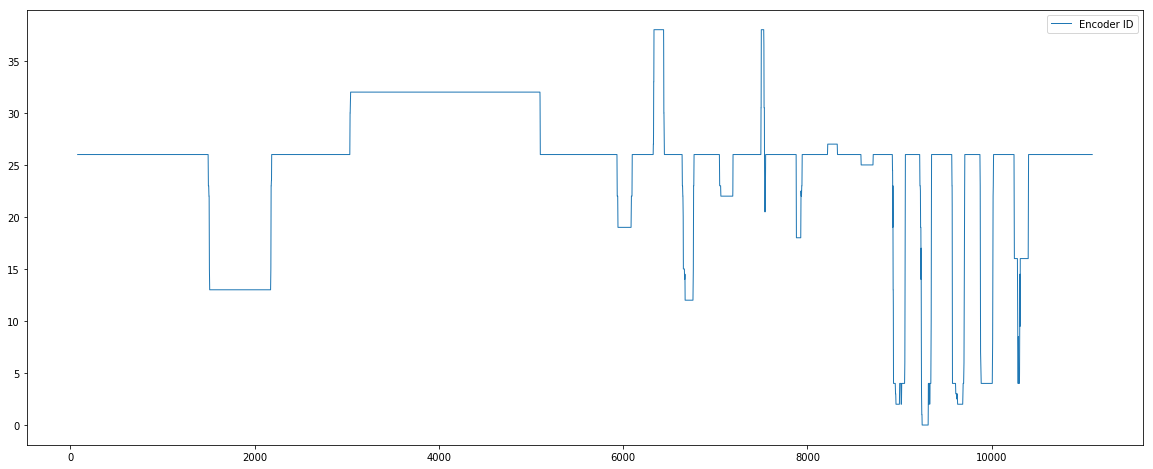

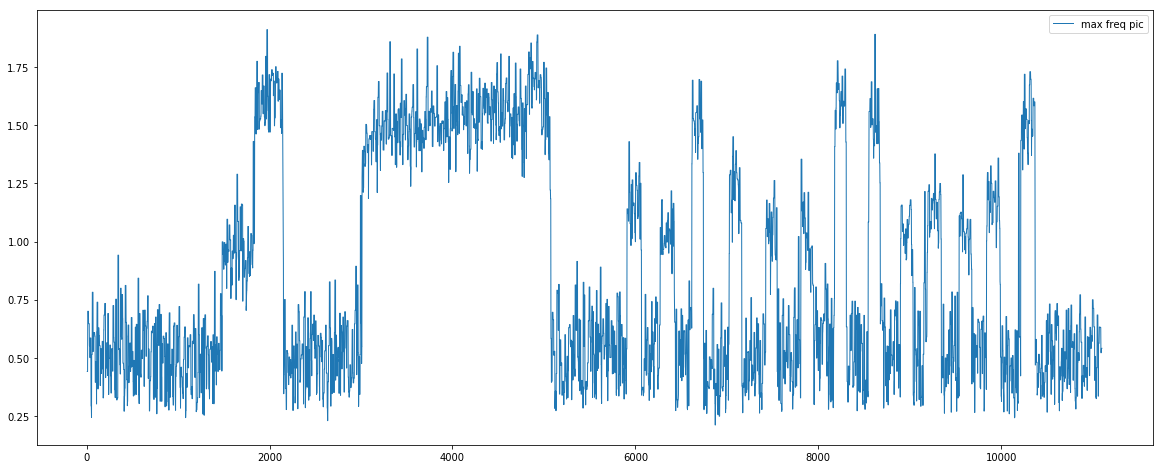

In [338]:
label_encoder = predictions

label_encoder_df = pd.DataFrame(label_encoder, columns=['Encoder ID']).rolling(80).median()
max_freq_pic = pd.DataFrame(predict_df.max(axis=1), columns=['max freq pic'])
label_encoder_df.plot()
max_freq_pic.plot()

In [160]:
character_chain = []
for i in range(1, len(probable_key)):
    if probable_key[i] != probable_key[i-1]:
        character_chain.append(probable_key[i])

character_chain

['CTRL',
 'NOKEY',
 'SHIFT',
 'NOKEY',
 'SHIFT',
 'NOKEY',
 'B',
 'U',
 'B',
 'U',
 'B',
 'U',
 'B',
 'NOKEY',
 'Q',
 'W',
 'Q',
 'W',
 'NOKEY',
 'C',
 'NOKEY',
 'K',
 'NOKEY',
 'W',
 'Q',
 'W',
 'Q',
 'A',
 'Q',
 'A',
 'Q',
 'W',
 'Q',
 'NOKEY',
 'T',
 'NOKEY',
 'L',
 'O',
 'NOKEY',
 'N',
 'NOKEY',
 '2',
 'NOKEY',
 '0',
 'NOKEY',
 '2',
 'NOKEY',
 '2',
 'NOKEY',
 'ENTER',
 'NOKEY']

In [161]:
character_chain = []
for i in range(1, len(probable_key)):
    if probable_key[i] != probable_key[i-1]:
        character_chain.append(probable_key[i])

chain = pd.DataFrame()
for i in range(0, len(character_chain)-50):
    if character_chain[i] == 'SHIFT':
        chain_chunk = character_chain[i:i+50]
        for j in chain_chunk:
            chain = pd.concat([chain, pd.DataFrame(chain_chunk)], axis=1)
            
majority_vote_list = []
for i in range(len(chain.values)):
    majority_vote_list.append(list(chain.iloc[i, :].unique()))

majority_vote_list

[]

In [ ]:
from collections import Counter
probable_key = []
for i in range(5, len(key_found.values)):
    last_i_charac = key_found.values[i-5:i]
    
    c = Counter(last_i_charac)
    c.most_common()
    value, count = c.most_common()[0]

    probable_key.append(value)

character_chain = []
for i in range(1, len(probable_key)):
    if probable_key[i] != probable_key[i-1]:
        character_chain.append(probable_key[i])

print(len(character_chain))
character_chain

In [ ]:
chain = pd.DataFrame()
for i in range(0, len(character_chain)-50):
    if character_chain[i] == 'CTRL':
        chain_chunk = character_chain[i:i+50]
        for j in chain_chunk:
            chain = pd.concat([chain, pd.DataFrame(chain_chunk)], axis=1)
chain

In [ ]:
majority_vote_list = []
for i in range(len(chain.values)):
    majority_vote_list.append(list(chain.iloc[i, :].unique()))

majority_vote_list

In [ ]:
def return_top_n_pred_prob_df(n, model, X_test, column_name):
    predictions = model.predict_proba(X_test)
    preds_idx = np.argsort(-predictions) 
    classes = pd.DataFrame(model.classes_, columns=['class_name'])
    classes.reset_index(inplace=True)
    top_n_preds = pd.DataFrame()
    for i in range(n):
        top_n_preds[column_name + '_prediction_{}_num'.format(i)] =     [preds_idx[doc][i] for doc in range(len(X_test))]
        top_n_preds[column_name + '_prediction_{}_probability'.format(i)] = [predictions[doc][preds_idx[doc][i]] for doc in range(len(X_test))]
        top_n_preds = top_n_preds.merge(classes, how='left', left_on= column_name + '_prediction_{}_num'.format(i), right_on='index')
        top_n_preds = top_n_preds.rename(columns={'class_name': column_name + '_prediction_{}'.format(i)})
        
        try: top_n_preds.drop(columns=['index', column_name + '_prediction_{}_num'.format(i)], inplace=True) 
        except: pass
    
    return top_n_preds

return_top_n_pred_prob_df(5, rsh, predict_df, 'pred')